# Wikipedia policy invocation (wikipi)

Updated: 14 May 2020

These are some figures for a project I'm working on relating to policy invocation (the practice of citing various Wikipedia rules--policies and guidelines--with direct links), specifically how this policy invocation differs across language edition editing communities. For folks you helped review my applications last fall, you may recognize this from my NSF GRFP proposal! I am presenting this project as a WIP at Collective Intelligence (CI2020) in a 15-minute pre-recorded talk (due at the end of this Month), a submission co-authored with Aaron.

The main idea behind this is that language editions of Wikipedia show high variance in rule pages and organization, despite their operation within the same overarching project, using the same software, and pursuing the same goals of creating high quality encyclopedic content. Specifically re:CI2020, the variance in both written rule and practice is interesting to me because it demonstrates that collective management/governance can happen in multiple ways; given that Wikipedia is touted as a great example of collective intelligence, but that prior research focuses disproportionately on English Wikipedia, I think it's valuable to look at how other communities collectively manage mass participation in dis/similar ways. More broadly, I think looking at the heterogeneity in governance practices <i>across</i> subcommunities that self-govern and thinking about it at a multi-community scale in this way are valuable because they can point to inconsistencies at a high-level for platforms (e.g. what constitutes harassment on Reddit).

The basic premise is that we consider a language edition of Wikipedia a distinct sub-community of editors on the broader platform. We begin by looking at the five language editions of Wikipedia with the most active editors (more than 5 edits in the last month): English, German, Spanish, French, and Japanese. When I look at written rule ("policy text") across language editions, there's significant variation in both rule pages and their organization.

In this portion, I look at policy invocation activity ("policy practice") on the Spanish, French, Japanese language editions of Wikipedia -- these are language editions with more comparable amounts of user activity (English Wikipedia as the main exceptional case) and additionally provide a list of their policies and guidelines (German Wikipedia does not).

#### Definitions
 * Active user - from Wiki Stats, a user who has made at least 5 edits in the last 30 days.
 * Interlanguage link - a technical feature on Wikipedia that connects pages considered equivalent across language editions
 * Core content policies Neutral Point of View (WP:NPOV), No Original Research (WP:NOR), and Verifiability (WP:V) ; these are of particular interest because prior literature has emphasized that older, core policies have more sustained attention-- and these policies all having been frequently mentioned either in literature or in my informal interviews with Wikipedia editors (I did a series of interviews for a course).

In [2]:
import sys
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
mastermake_path = "/mnt/d/Sohyeon/NU/PROJECTS/wikipi/tsv_mastermake_outputs/20200511"
monthly = mastermake_path + "/monthly"
monthly_namespace = mastermake_path + "/monthly_namespace"
editors = "/mnt/d/Sohyeon/NU/PROJECTS/wikipi/wikipi_repo/active_editors"

# Read the data in
pd_monthly_eswiki = pd.read_csv(monthly + "/eswiki_mdf.csv", sep="\t", header=0)
pd_monthly_frwiki = pd.read_csv(monthly + "/frwiki_mdf.csv", sep="\t", header=0)
pd_monthly_jawiki = pd.read_csv(monthly + "/jawiki_mdf.csv", sep="\t", header=0)

pd_editors_eswiki = pd.read_csv(editors + "/active-editors-monthly_es.csv", sep=",",header=0)
pd_editors_eswiki = pd_editors_eswiki.rename(columns={'month':'month', 'total.anonymous':'total_anon', 'total.group-bot':'total_groupbot', 'total.name-bot':'total_namebot','total.user':'total_user', 'timeRange.start':'timeRange_start', 'timeRange.end':'timeRange_end'})
pd_editors_frwiki = pd.read_csv(editors + "/active-editors-monthly_fr.csv", sep=",",header=0)
pd_editors_frwiki = pd_editors_frwiki.rename(columns={'month':'month', 'total.anonymous':'total_anon', 'total.group-bot':'total_groupbot', 'total.name-bot':'total_namebot','total.user':'total_user', 'timeRange.start':'timeRange_start', 'timeRange.end':'timeRange_end'})
pd_editors_jawiki = pd.read_csv(editors + "/active-editors-monthly_ja.csv", sep=",",header=0)
pd_editors_jawiki = pd_editors_jawiki.rename(columns={'month':'month', 'total.anonymous':'total_anon', 'total.group-bot':'total_groupbot', 'total.name-bot':'total_namebot','total.user':'total_user', 'timeRange.start':'timeRange_start', 'timeRange.end':'timeRange_end'})

In [4]:
pd_monthly_eswiki['YYYY-MM'] = pd_monthly_eswiki.apply(lambda row: "{}-{}".format(row.es_year, row.es_month) if row.es_month >=10 else "{}-0{}".format(row.es_year, row.es_month), axis = 1) 
pd_monthly_eswiki['es_core_percent'] = pd_monthly_eswiki.apply(lambda row: row.es_num_revs_with_core_diff / row.es_num_revs_with_regex_diff if row.es_num_revs_with_regex_diff > 0 else 0, axis=1)
pd_monthly_frwiki['YYYY-MM'] = pd_monthly_frwiki.apply(lambda row: "{}-{}".format(row.fr_year, row.fr_month) if row.fr_month >=10 else "{}-0{}".format(row.fr_year, row.fr_month), axis = 1) 
pd_monthly_frwiki['fr_core_percent'] = pd_monthly_frwiki.apply(lambda row: row.fr_num_revs_with_core_diff / row.fr_num_revs_with_regex_diff if row.fr_num_revs_with_regex_diff > 0 else 0, axis=1)
pd_monthly_jawiki['YYYY-MM'] = pd_monthly_jawiki.apply(lambda row: "{}-{}".format(row.ja_year, row.ja_month) if row.ja_month >=10 else "{}-0{}".format(row.ja_year, row.ja_month), axis = 1) 
pd_monthly_jawiki['ja_core_percent'] = pd_monthly_jawiki.apply(lambda row: row.ja_num_revs_with_core_diff / row.ja_num_revs_with_regex_diff if row.ja_num_revs_with_regex_diff > 0 else 0, axis=1)

## Policy invocation activity

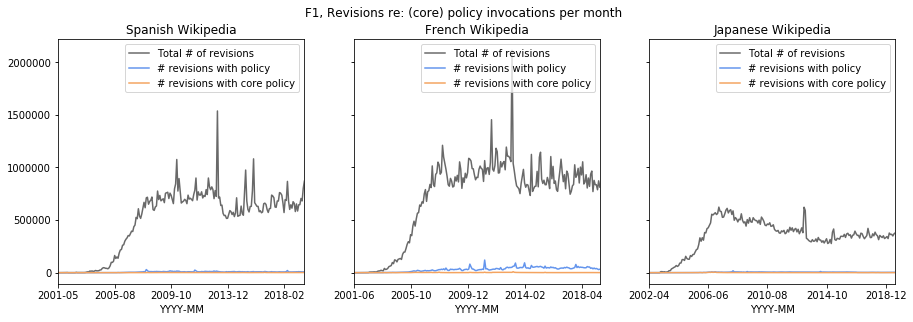

In [5]:
# Number of revisions per month, # of policy invocations per month, # of core / month
fig1, axs = plt.subplots(1,3, sharey=True)
fig1.set_size_inches(15, 4.5)
fig1.suptitle('F1, Revisions re: (core) policy invocations per month')

axs[0].set_title('Spanish Wikipedia')
pd_monthly_eswiki.plot(kind='line',x='YYYY-MM',y='es_num_revs',color='dimgrey',label="Total # of revisions",ax=axs[0])
pd_monthly_eswiki.plot(kind='line',x='YYYY-MM',y='es_num_revs_with_regex_diff',label="# revisions with policy",
                       color='cornflowerblue', ax=axs[0])
pd_monthly_eswiki.plot(kind='line',x='YYYY-MM',y='es_num_revs_with_core_diff', label="# revisions with core policy",
                       color='sandybrown', ax=axs[0])

axs[1].set_title('French Wikipedia')
pd_monthly_frwiki.plot(kind='line',x='YYYY-MM',y='fr_num_revs',color='dimgrey',label="Total # of revisions",ax=axs[1])
pd_monthly_frwiki.plot(kind='line',x='YYYY-MM',y='fr_num_revs_with_regex_diff',label="# revisions with policy",
                       color='cornflowerblue', ax=axs[1])
pd_monthly_frwiki.plot(kind='line',x='YYYY-MM',y='fr_num_revs_with_core_diff', label="# revisions with core policy",
                       color='sandybrown', ax=axs[1])

axs[2].set_title('Japanese Wikipedia')
pd_monthly_jawiki.plot(kind='line',x='YYYY-MM',y='ja_num_revs',color='dimgrey',label="Total # of revisions",ax=axs[2])
pd_monthly_jawiki.plot(kind='line',x='YYYY-MM',y='ja_num_revs_with_regex_diff',label="# revisions with policy",
                       color='cornflowerblue', ax=axs[2])
pd_monthly_jawiki.plot(kind='line',x='YYYY-MM',y='ja_num_revs_with_core_diff', label="# revisions with core policy",
                       color='sandybrown', ax=axs[2])

plt.setp(axs,xticks=[0,50,100,150,200])

plt.show()

(^ I'm curious what people think/know that spike ~2012 is?)

Revisions containing changes relating the policy invocations make up a very small % of total revisions consistently over time, which is unsurprising. What is more interesting is that the F2 and F3 indicate that the three language editions have had variable policy practices. F2: By the end of 2018, Spanish Wikipedia and Japanese Wikipedia's about 20% of policy-related revisions involved one of the major core content policies while in French Wikipedia, that percent looks to be close to 0. Spanish Wikipedia and Japanese Wikipedia are closer in size, but we also see that the temporal change for the language editions are not the same (Japanese Wikipedia having had a jump atound 2016), though the shape could be argued to be similar.

In F3, we see that the per user rate of policy-related revisions also vary across language editions.


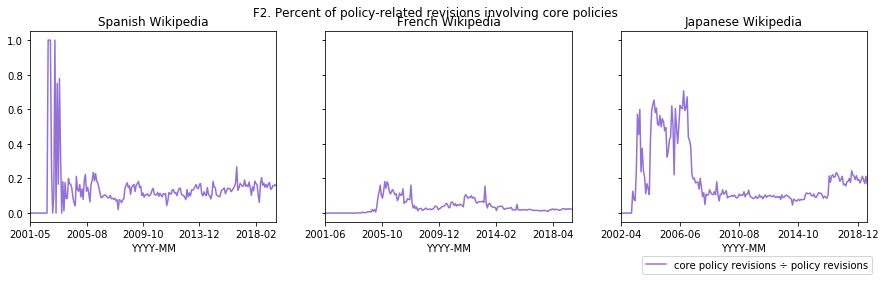

In [9]:
# Percent of of policy invocations that are core / month

fig2, axs = plt.subplots(1,3, sharey=True)
fig2.set_size_inches(15, 3.5)

fig2.suptitle('F2. Percent of policy-related revisions involving core policies')
axs[0].set_title('Spanish Wikipedia')
axs[1].set_title('French Wikipedia')
axs[2].set_title('Japanese Wikipedia')

l1 = pd_monthly_eswiki.plot(kind='line',x='YYYY-MM',y='es_core_percent',color='mediumpurple',legend=None,ax=axs[0])
l2 = pd_monthly_frwiki.plot(kind='line',x='YYYY-MM',y='fr_core_percent',color='mediumpurple',legend=None,ax=axs[1])
l3 = pd_monthly_jawiki.plot(kind='line',x='YYYY-MM',y='ja_core_percent',color='mediumpurple',legend=None,ax=axs[2])

plt.legend(l1,labels=["core policy revisions ÷ policy revisions"],bbox_to_anchor=(1.04,-.3), loc='lower right', ncol=1)

plt.setp(axs,xticks=[0,50,100,150,200])

plt.show()

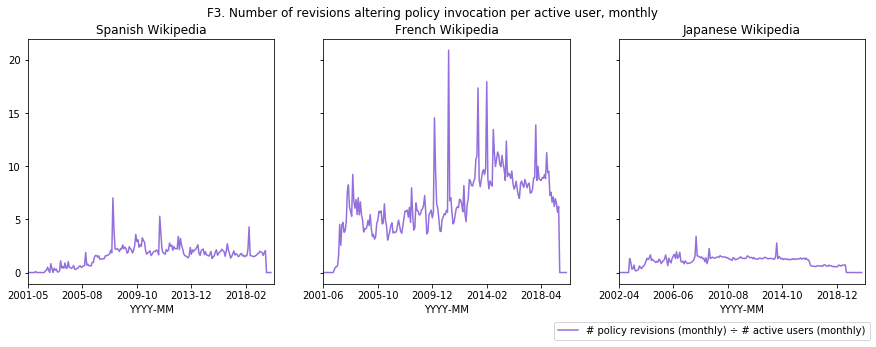

In [10]:
# (499-f1) - Number of revisions with policy invocation / number of active users

pd_editors_eswiki['YYYY-MM'] = pd_editors_eswiki.apply(lambda row: row.month[:7], axis=1)
pd_editors_frwiki['YYYY-MM'] = pd_editors_frwiki.apply(lambda row: row.month[:7], axis=1)
pd_editors_jawiki['YYYY-MM'] = pd_editors_jawiki.apply(lambda row: row.month[:7], axis=1)

f1_es_df = pd.merge(pd_monthly_eswiki,pd_editors_eswiki,on='YYYY-MM',how='outer')
f1_es_df['pi-rev_users'] = f1_es_df.apply(lambda row: row.es_num_revs_with_regex_diff / row.total_user 
                                          if row.total_user > 0 else 0, axis=1)

f1_fr_df = pd.merge(pd_monthly_frwiki,pd_editors_frwiki,on='YYYY-MM',how='outer')
f1_fr_df['pi-rev_users'] = f1_fr_df.apply(lambda row: row.fr_num_revs_with_regex_diff / row.total_user 
                                          if row.total_user > 0 else 0, axis=1)

f1_ja_df = pd.merge(pd_monthly_jawiki,pd_editors_jawiki,on='YYYY-MM',how='outer')
f1_ja_df['pi-rev_users'] = f1_ja_df.apply(lambda row: row.ja_num_revs_with_regex_diff / row.total_user 
                                          if row.total_user > 0 else 0, axis=1)

fig3, axs = plt.subplots(1,3, sharey=True)
fig3.set_size_inches(15, 4.5)
fig3.suptitle('F3. Number of revisions altering policy invocation per active user, monthly')
axs[0].set_title('Spanish Wikipedia')
axs[1].set_title('French Wikipedia')
axs[2].set_title('Japanese Wikipedia')

f1_es_df.plot(kind='line',x='YYYY-MM',y='pi-rev_users',color='mediumpurple',legend=None,ax=axs[0])
f1_fr_df.plot(kind='line',x='YYYY-MM',y='pi-rev_users',color='mediumpurple',legend=None,ax=axs[1])
f1_ja_df.plot(kind='line',x='YYYY-MM',y='pi-rev_users',color='mediumpurple',legend=None,ax=axs[2])

plt.setp(axs,xticks=[0,50,100,150,200])

plt.legend(l1,labels=["# policy revisions (monthly) ÷ # active users (monthly)"],bbox_to_anchor=(1.04,-.25), 
           loc='lower right', ncol=1)

plt.show()

Policy invocation per user is consistently much more active in French Wikipedia; this is not necessarily because of bots, though French Wikipedia does have a bit over twice the number of active bots now than the other two language editions. It may be that in French Wikipedia, the more numerous bots are doing a disprotionately larger number of policy invocation work, making the numbers here higher. What I actually think is more true, though, is that French Wikipedia has a lot more admins--as of 14 May 2020, French Wikipedia had 159 admins while Spanish and Japanese had 67 and 37 respectively.

As context, here is some user activity-level data below (from WikiStats):

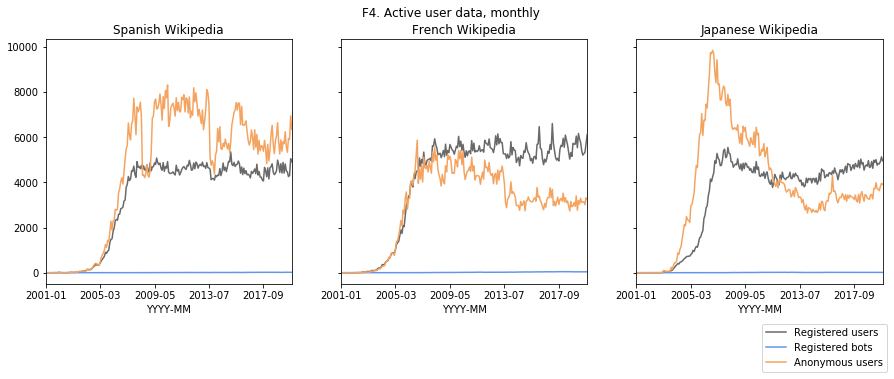

In [11]:
fig4, axs = plt.subplots(1,3, sharey=True)
fig4.set_size_inches(15, 4.5)
fig4.suptitle('F4. Active user data, monthly')

axs[0].set_title('Spanish Wikipedia')
axs[1].set_title('French Wikipedia')
axs[2].set_title('Japanese Wikipedia')

pd_editors_eswiki.plot(kind='line',x='YYYY-MM',y='total_user',color='dimgrey',legend=None,ax=axs[0])
pd_editors_eswiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[0])
pd_editors_eswiki.plot(kind='line',x='YYYY-MM',y='total_anon',color='sandybrown',legend=None,ax=axs[0])
#total_groupbot - bot that is registered and part of the bot group
#total_namebot - user with the word 'bot' in the name (not necessarily bot)

pd_editors_frwiki.plot(kind='line',x='YYYY-MM',y='total_user',color='dimgrey',legend=None,ax=axs[1])
pd_editors_frwiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[1])
pd_editors_frwiki.plot(kind='line',x='YYYY-MM',y='total_anon',color='sandybrown',legend=None,ax=axs[1])

pd_editors_jawiki.plot(kind='line',x='YYYY-MM',y='total_user',color='dimgrey',legend=None,ax=axs[2])
pd_editors_jawiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[2])
pd_editors_jawiki.plot(kind='line',x='YYYY-MM',y='total_anon',color='sandybrown',legend=None,ax=axs[2])

plt.legend(l1,labels=["Registered users","Registered bots","Anonymous users"],bbox_to_anchor=(1.04,-.38), 
           loc='lower right', ncol=1)

plt.setp(axs,xticks=[0,50,100,150,200])

plt.show()

The number of active users ... and below, specifically bots.

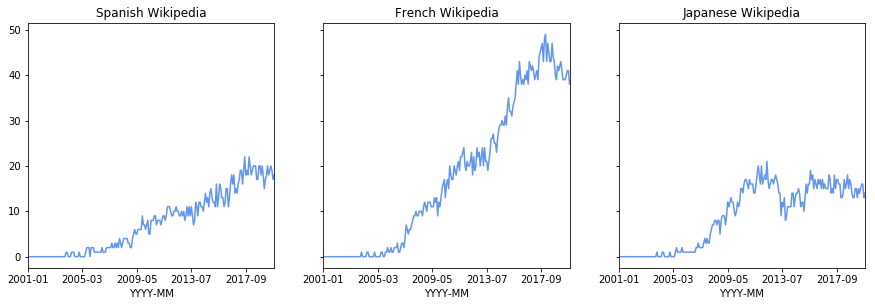

In [12]:
fig5, axs = plt.subplots(1,3, sharey=True)
fig5.set_size_inches(15, 4.5)
fig4.suptitle('F5. Registered active bot users, monthly')

axs[0].set_title('Spanish Wikipedia')
axs[1].set_title('French Wikipedia')
axs[2].set_title('Japanese Wikipedia')

pd_editors_eswiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[0])
pd_editors_frwiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[1])
pd_editors_jawiki.plot(kind='line',x='YYYY-MM',y='total_groupbot',color='cornflowerblue',legend=None,ax=axs[2])

### Namespaces
Policy-related revisions are most common in the same five namespaces (top 5) across the three language editions: User talk, Article Talk, Wikipedia, Main/Article, User.

Namespace number that don't have a corresponding name -- I couldn't find what those namespaces were on Wikipedia.

In [13]:
# Namespaces with most policy invocations per language edition
pd_mndf_eswiki = pd.read_csv(monthly_namespace + "/eswiki_mndf.csv", sep="\t", header=0)
pd_mndf_frwiki = pd.read_csv(monthly_namespace + "/frwiki_mndf.csv", sep="\t", header=0)
pd_mndf_jawiki = pd.read_csv(monthly_namespace + "/jawiki_mndf.csv", sep="\t", header=0)

namespace_key = pd.read_csv("/mnt/d/Sohyeon/NU/PROJECTS/wikipi/namespace.tsv", sep="\t", header=0)

eswiki_nmdf = pd_mndf_eswiki.groupby('namespace').sum().reset_index().sort_values('num_revs_with_regex_diff',ascending=False)
frwiki_nmdf = pd_mndf_frwiki.groupby('namespace').sum().reset_index().sort_values('num_revs_with_regex_diff',ascending=False)
jawiki_nmdf = pd_mndf_jawiki.groupby('namespace').sum().reset_index().sort_values('num_revs_with_regex_diff',ascending=False)

eswiki_nmdf = pd.merge(eswiki_nmdf, namespace_key, on="namespace", how="outer").drop(['year','month'],axis=1)
frwiki_nmdf = pd.merge(frwiki_nmdf, namespace_key, on="namespace", how="outer").drop(['year','month'],axis=1)
jawiki_nmdf = pd.merge(jawiki_nmdf, namespace_key, on="namespace", how="outer").drop(['year','month'],axis=1)

eswiki_nmdf.head(10)

,namespace,num_revs,num_revs_with_regex_diff,num_revs_with_core_diff,nm_name
0,3,5694948,1113867,139050,User talk
1,1,2645713,121243,16947,Article Talk
2,4,2429411,105696,14461,Wikipedia
3,0,87116508,65674,3883,Main/Article
4,2,2850456,39346,3316,User
5,5,110287,8144,739,Wikipedia talk
6,104,4471348,5657,165,
7,102,343789,5489,504,
8,10,764110,5035,424,Template
9,103,88008,3364,430,


In [14]:
frwiki_nmdf.head(10)

,namespace,num_revs,num_revs_with_regex_diff,num_revs_with_core_diff,nm_name
0,3,9078004.0,4929779.0,195769.0,User talk
1,4,4047931.0,483728.0,15474.0,Wikipedia
2,1,8980679.0,339783.0,43879.0,Article Talk
3,0,110381323.0,231540.0,1128.0,Main/Article
4,2,5287856.0,214124.0,4678.0,User
5,103,676002.0,141996.0,2209.0,
6,102,6373767.0,88757.0,733.0,
7,5,322435.0,43561.0,1241.0,Wikipedia talk
8,828,153870.0,36020.0,0.0,Module
9,10,2608801.0,20170.0,316.0,Template


In [15]:
jawiki_nmdf.head(10)

,namespace,num_revs,num_revs_with_regex_diff,num_revs_with_core_diff,nm_name
0,3,1573849.0,619734.0,86003.0,User talk
1,4,1992842.0,90804.0,12650.0,Wikipedia
2,1,1453737.0,72775.0,26245.0,Article Talk
3,0,60986591.0,44540.0,7073.0,Main/Article
4,2,1384063.0,20054.0,4094.0,User
5,5,118297.0,12207.0,2084.0,Wikipedia talk
6,10,1063415.0,5873.0,643.0,Template
7,103,79981.0,5600.0,1251.0,
8,14,1799150.0,2054.0,35.0,Category
9,11,43283.0,1518.0,274.0,Template talk


## In the works...
I actually have more refined datasets in terms of tracking policy invocation, but I haven't processed the relevant pandas dfs to calculate diffs by-revision (whereas this is monthly aggregate accounts of if a revision involved a change in captured policy invocations) -- this is almost there. I'm hoping I'll to that this weekened, probably running graphs similar to this (but I expect the numbers to be more precise than what this is).

Two more graph's I'd like to generate is to go beyond the core content policies as indicators of shared policy and use the interlanguage links. This involves first building up a matrix of when a policy page on language edition X got ILL-ed to the policy page on language edition Y, and then the idea is to generate a plot that calculates the % of policies invoked that are interlanguage linked policies versus not, over time, for each of the three language editions. I don't think I'll have this in time for Collective Intelligence.

In [ ]:
# From by-revision diff data, monthly plots of the actual number of discrete policy invocations
# (instead of # of revisions with policy invocation diff (generally taken as new policy invocation, \
# but more accurately should be considered alterations to policy invocations on a page (new or moved or deleted) ))

# (499-f4) - Percentage of policy invocation instances that are interlanguage-linked policies 